# Avaliando precisão e Acurácia em modelos supervisionados: Random Forest e Decision Tree





Este projeto tem como objetivo avaliar a acurácia e a precisão dos modelos Decision Tree e Random Forest sobre um dataset sobre Phishing e estabelecer aspectos positivos do machine learning associados a área de segurança cibernética.
#Um breve resumo sobre o modelo de àrvore de decisão:

 Como as SVM, as Árvores de Decisão são algoritmos versáteis de Aprendizado de Máquina que podem executar tarefas de classificação, regressão e, até mesmo, tarefas multioutput. São algoritmos muito poderosos capazes de moldar conjuntos complexos de dados. ( Aurélien Géron, 2019, p.171).

Auriélien (2019, p. 171) acrescenta a tudo isso mais um fator, As Árvores de Decisão também são os componentes fundamentais das Florestas Aleatórias (veja o Capítulo 7), que estão entre os algoritmos de Aprendizado de Máquina mais poderosos disponíveis atualmente.

##Importando as bibliotecas


In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns



#importando o dataset (Base de dados)


##Description
These data consist of a collection of legitimate as well as phishing website instances. Each website is represented by the set of features which denote, whether website is legitimate or not. Data can serve as an input for machine learning process.

Vrbančič, Grega (2020), “Phishing Websites Dataset”, Mendeley Data, V1, doi: 10.17632/72ptz43s9v.1

Link : https://data.mendeley.com/datasets/72ptz43s9v/1

In [ ]:
#importa a base
dataset = pd.read_csv("/content/drive/MyDrive/TCC-Dataset/dataset_small.csv")

#Visualizandoo dataset e as dimesões do dataframe

In [ ]:

# dimensões do df
print("Dimensões do data frame:")
print("Linhas:\t\t{}".format(dataset.shape[0]))
print("Colunas:\t{}".format(dataset.shape[1]))
#visualiza a base
dataset.head()

Dimensões do data frame:
Linhas:		58645
Colunas:	112


,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,...,1,4,2,3598,0,0,0,0,0,0
1,4,0,0,2,0,0,0,0,0,0,...,1,4,1,3977,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,2,1,10788,0,0,0,0,0,0
3,2,0,0,3,0,0,0,0,0,0,...,1,2,1,14339,1,0,0,0,0,1
4,1,1,0,4,0,0,0,0,0,0,...,1,2,1,389,1,1,0,0,0,1


Verificando os tipos de variáveis associadas a este dataset

In [ ]:
# tipo das variáveis
print("\nVariáveis:")
print(dataset.dtypes)


Variáveis:
qty_dot_url             int64
qty_hyphen_url          int64
qty_underline_url       int64
qty_slash_url           int64
qty_questionmark_url    int64
                        ...  
qty_redirects           int64
url_google_index        int64
domain_google_index     int64
url_shortened           int64
phishing                int64
Length: 112, dtype: object


Verificando a quantidade de valores ausentes por feature no dataset, essa informação é importante pois a falta destes dados pode afetar ignificativamente a qualidade e a utilidade desse conjunto de dados.

In [ ]:
# valores ausentes
print("\nVALORES AUSENTES:")
print((dataset.isnull().sum() / dataset.shape[0]).sort_values(ascending=False))


VALORES AUSENTES:
qty_dot_url                0.0
qty_hyphen_url             0.0
qty_at_params              0.0
qty_equal_params           0.0
qty_questionmark_params    0.0
                          ... 
qty_hashtag_domain         0.0
qty_asterisk_domain        0.0
qty_plus_domain            0.0
qty_comma_domain           0.0
phishing                   0.0
Length: 112, dtype: float64


Agora iremos analisar a quantidade de dados associados ao target 'phising' neste data set.



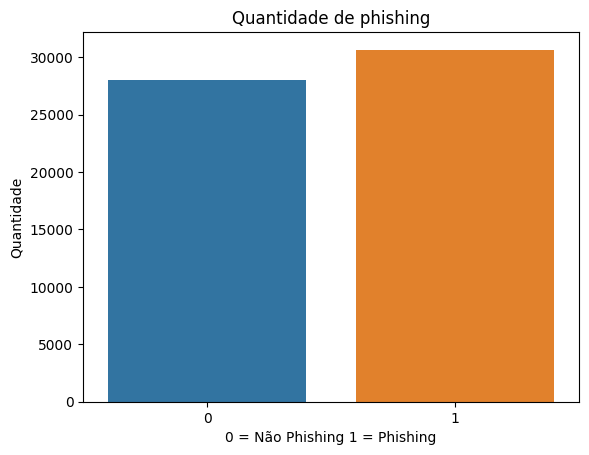

Proporção entre Phising no Dataset:
1    0.522585
0    0.477415
Name: phishing, dtype: float64


In [ ]:
# Proporção de Phishing presentes no dataset
fig, ax = plt.subplots()
sns.countplot(x='phishing', data=dataset, ax=ax)
ax.set_title("Quantidade de phishing")
ax.set_xlabel("0 = Não Phishing 1 = Phishing")
ax.set_ylabel("Quantidade")
plt.show()

print("Proporção entre Phising no Dataset:")
print(dataset['phishing'].value_counts() / dataset.shape[0])

##Agora iremos separar a variável target 'phishing' das outras variáveis e dividir o dataset em duas partes sendo:                             

1.   Dados de Treino = 70% da base para treino
2.   Dados de Teste = 30% do dataset para teste (teste_size)

#Na divisão utilizaremos a função `train_test_split`.


In [ ]:
#separa X e Y
X = dataset.drop ('phishing', axis =1)
y = dataset.phishing

In [ ]:
#treina o modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)
X_train.shape, X_test.shape


((39292, 111), (19353, 111))

#Etapa de construção do modelo#
Utilizaremos dois modelos supervisionados simples de Classificação Decision tree e Random Forest, como mencionado inicialmente, a proposta deste estudo é avaliar a acurácia dos modelos através do dataset processado anteriormente e estabelecer pontos positivos do uso de ML no âmbito da segurança da informação, contribuindo de alguma maneira para futuras pesquisas neste espectro.
                                              

Métricas utilizadas para este estudo:

Accurácia : Como informado utilizaremos esta métrica no sentido de realizar uma verificação mais generalista, diante do pressuposto, existe a possibilidade de não ser uma solução ideal inicialmente, porém, utilizremos como ponto de partida para futuras correlações.

Um dos problemas da árvore de decisão é a possibilidade dela decorar os dados e não generalizar, isso significa que a árvore pode se adequar perfeitamente apenas na base teste não tendo um bom resultado quando é submetida a outra base.

Existem algumas formas de minimizar essa limitação, uma delas é podar a arvore a fim de evitar que o overfitting afete a tomada de decisão.

Limitaremos o tamanho da árvore através do max_depth para 3.

In [ ]:
# Criar o modelo da árvore de decisão
modelo_arvore = DecisionTreeClassifier()

# Treinar o modelo com os dados de treinamento
modelo_arvore.fit(X_train, y_train)

# Fazer previsões com o modelo nos dados de teste
previsoes = modelo_arvore.predict(X_test)

# Calcular a acurácia
acuracia = accuracy_score(y_test, previsoes)

# Calcular a precisão
precisao = precision_score(y_test, previsoes)

# Imprimir a acurácia
print(f'Acurácia do modelo de árvore de decisão: {acuracia}')

# Imprimir a precisão
print(f'Precisão do modelo de árvore de decisão: {precisao}')

Acurácia do modelo de árvore de decisão: 0.9293132847620524
Precisão do modelo de árvore de decisão: 0.9320407557621921


mesmo não tendo aplicado tuning de hiperparâmetros nos dados do modelo acima, conseguimos o resultado de 93% na nossa baseline.
 Avaliaremos a matriz de confusão:



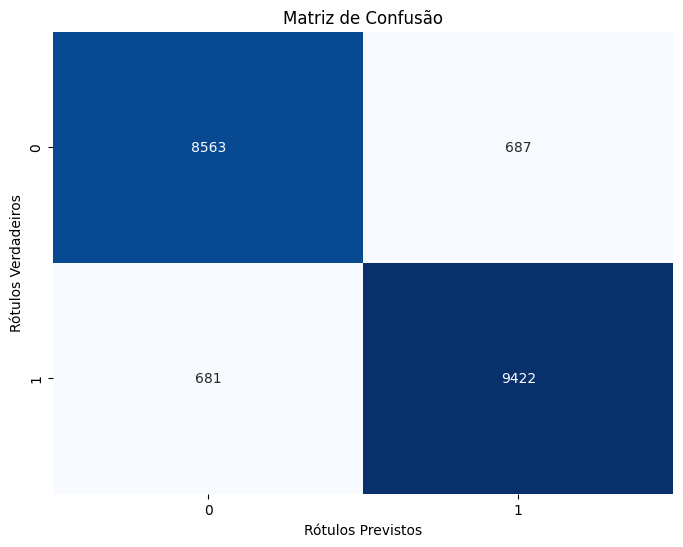

In [ ]:
 #Calcular a matriz de confusão
matriz_confusao = confusion_matrix(y_test, previsoes)

# Visualizar a matriz de confusão usando um mapa de calor (opcional)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()

**Primeira Linha:**

8563 é o número de verdadeiros positivos (TP) para a classe positiva, isso representa o número de instâncias da classe positiva corretamente classificadas como positivas. É um indicativo de quão bem o modelo acertou os casos positivos.

687 é o número de falsos negativos (FN) para a classe positiva, isso representa o número de instâncias da classe positiva que foram erroneamente classificadas como negativas. Em outras palavras, são casos positivos que o modelo perdeu.

**Segunda Linha:**

681 é o número de falsos positivos (FP) para a classe negativa, isso representa o número de instâncias da classe negativa que foram erroneamente classificadas como positivas. São erros em que o modelo "falsamente" previu a classe positiva.

9422 é o número de verdadeiros negativos (TN) para a classe negativa, isso representa o número de instâncias da classe negativa corretamente classificadas como negativas. É um indicativo de quão bem o modelo acertou os casos negativos.

Um dos problemas da árvore de decisão é a possibilidade dela decorar os dados e não generalizar, isso significa que a árvore pode se adequar perfeitamente apenas na base teste não tendo um bom resultado quando é submetida a outra base.

Existem algumas formas de minimizar essa limitação, uma delas é podar a arvore a fim de evitar que o overfitting afete a tomada de decisão.

Limitaremos o tamanho da árvore através do max_depth

#Podando a árvore definindo o MAX_DEPH e verificando o desenpenho.

Quanto mais nós a árvore possui, maior é a probabilidade da arvore sofrer overfitting e se tornar menos generalizável.

Ajustaremos a profundidade máxima da árvore através do Hiperparâmetro max_deph

In [ ]:
#importa o dataset
dataset = pd.read_csv("/content/drive/MyDrive/TCC-Dataset/dataset_small.csv")


In [ ]:
#Retorna os dados
dataset.head(3)



,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,...,1,4,2,3598,0,0,0,0,0,0
1,4,0,0,2,0,0,0,0,0,0,...,1,4,1,3977,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,2,1,10788,0,0,0,0,0,0


#Criando um novo classificador "Podando a árvore" usando o max_deph, definindo a produnfidade da árvore.
Definiremos como teste que o nivel máximo de profundidade da árvore será 3 e veremos como essa árvore se comportará

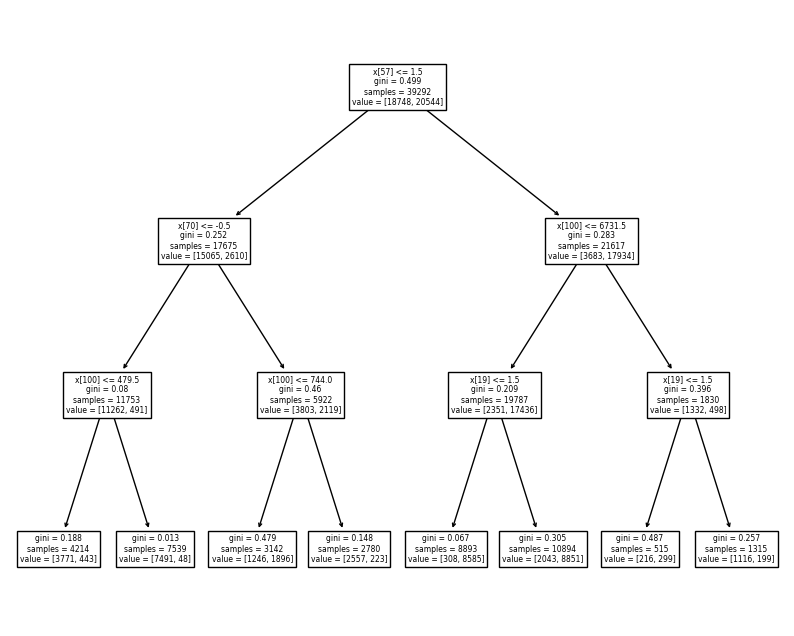

In [ ]:
clf =  tree.DecisionTreeClassifier (random_state =0,max_depth=3).fit(X_train,y_train)

fig,ax=plt.subplots(figsize=(10,8))
tree.plot_tree(clf)
plt.show()



In [ ]:
# Treinar o modelo com os dados de treinamento
clf.fit(X_train, y_train)

# Fazer previsões com o modelo nos dados de teste
previsoes = clf.predict(X_test)

# Calcular a acurácia após a poda da árvore
acuracia = accuracy_score(y_test, previsoes)

# Calcular a precisão após a poda da árvore
precisao = precision_score(y_test, previsoes)

# Imprimir a acurácia e a precisão após a poda da árvore
print(f'Acurácia do modelo de árvore de decisão: {acuracia}')
print(f'Precisão do modelo de árvore de decisão: {precisao}')

Acurácia do modelo de árvore de decisão: 0.8787268123805095
Precisão do modelo de árvore de decisão: 0.8354090987718388


#Conclusão#

Após diminuir a profundidade da árvore, verificamos que a acurácia do modelo de árvore de decisão foi reduzida para 88% e a precisão caiu para 83%, isso acontece porque uma árvore de decisão rasa é menos complexa e tem menos capacidade de se ajustar a detalhes complexos nos dados. Levantaremos alguns pontos quanto a essa alteração:

1- Perda de Informações Detalhadas: Quando você diminui max_depth, a árvore de decisão se torna mais rasa e não pode dividir os dados em níveis mais profundos. Isso leva à perda de informações detalhadas e a uma capacidade reduzida de discernir padrões complexos e sutis nos dados.

2 -Overfitting Reduzido: Árvores de decisão profundas têm maior probabilidade de se adaptar excessivamente aos dados de treinamento, criando divisões que capturam ruídos. Reduzir a profundidade limita a complexidade do modelo, reduzindo assim a tendência ao overfitting, mas também resulta em menor capacidade de adaptação.

3- Limitações na Representação: Para conjuntos de dados complexos, a representação fornecida por uma árvore rasa pode não ser suficiente para modelar os padrões intrincados presentes. Uma árvore mais profunda é capaz de representar melhor esses padrões.

4- Viés Reduzido: Uma árvore rasa tem mais viés, o que significa que ela faz suposições simplificadas sobre os dados. Isso pode não ser ideal se os dados são intrinsecamente complexos e requerem uma modelagem mais flexível.

5- Sensibilidade a Hiperparâmetros: A profundidade máxima (max_depth) é um hiperparâmetro que influencia o trade-off entre viés e variância no modelo. Ao reduzir esse hiperparâmetro, você está controlando a capacidade do modelo de se ajustar aos dados. Um valor muito baixo torna o modelo muito enviesado, enquanto um valor muito alto pode levar ao overfitting. Encontrar o valor ideal é parte do ajuste de hiperparâmetros.

Em resumo, a diminuição de max_depth simplifica a árvore de decisão, limitando sua capacidade de modelar complexidades nos dados. Isso é frequentemente feito para controlar o overfitting, mas pode resultar em uma menor acurácia, especialmente quando os dados são intrinsecamente complexos e exigem uma representação mais detalhada. A seleção adequada da profundidade da árvore é crucial para equilibrar a capacidade de adaptação do modelo e evitar o overfitting.

##Avaliando a acurácia no modelo Random Forest



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt


#separa X e Y
X = dataset.drop ('phishing', axis =1)
y = dataset.phishing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Acurácia do modelo Random Forest: 0.9570876435148346
Precisão do modelo Random Forest: 0.9543048503834936
Matriz de Confusão:
[[8005  423]
 [ 332 8834]]


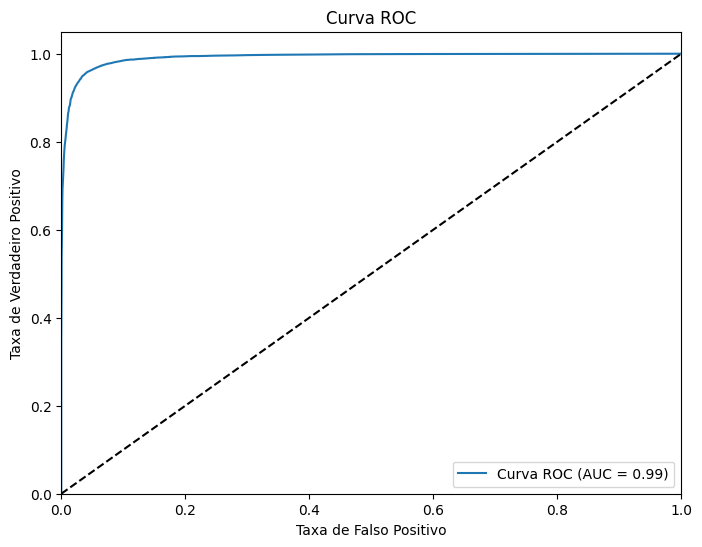

In [ ]:
# Criar o modelo Random Forest
modelo_random_forest = RandomForestClassifier()

# Treinar o modelo com os dados de treinamento
modelo_random_forest.fit(X_train, y_train)

# Fazer previsões com o modelo nos dados de teste
previsoes = modelo_random_forest.predict(X_test)

# Calcular a acurácia
acuracia = accuracy_score(y_test, previsoes)

# Calcular a precisão
precisao = precision_score(y_test, previsoes)

# Calcular a matriz de confusão
matriz_confusao = confusion_matrix(y_test, previsoes)

# Calcular a curva ROC e a área sob a curva (AUC)
probabilidades = modelo_random_forest.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probabilidades)
area_curva_roc = roc_auc_score(y_test, probabilidades)

# Imprimir a acurácia
print(f'Acurácia do modelo Random Forest: {acuracia}')

# Imprimir a precisão
print(f'Precisão do modelo Random Forest: {precisao}')

# Imprimir a matriz de confusão
print('Matriz de Confusão:')
print(matriz_confusao)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {area_curva_roc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

#Uma breve descrição dos resultados encontrados na Random Forest

Acurácia e Precisão: A acurácia e a precisão do modelo Random Forest é de aproximadamente 0.9572 (ou 95%). A acurácia representa a proporção de previsões corretas em relação ao total de previsões, indicando o quão bem o modelo está se saindo na classificação.

Matriz de Confusão: A matriz de confusão é uma tabela que mostra os resultados da classificação, Neste caso, econtramos os seguintes resultados :

Verdadeiros Positivos (TP): 7987 - O número de instâncias da classe positiva corretamente classificadas como positivas.

Falsos Negativos (FN): 441 - O número de instâncias da classe positiva que foram erroneamente classificadas como negativas.

Falsos Positivos (FP): 335 - O número de instâncias da classe negativa que foram erroneamente classificadas como positivas.

Verdadeiros Negativos (TN): 8831 - O número de instâncias da classe negativa corretamente classificadas como negativas.

Com base nos dados fornecidos foi verificado

A acurácia e precisão do modelo Random Forest é de aproximadamente 95.72%.


Conclusão:

O modelo de Random Forest obteve um desempenho geral muito bom com uma acurácia de 95.72%. A matriz de confusão confirma isso, mostrando um alto número de verdadeiros positivos e verdadeiros negativos em comparação com um número relativamente baixo de falsos positivos e falsos negativos. Isso indica que o modelo é capaz de fazer previsões precisas e discriminatórias para as classes em questão.

Em resumo, com base na acurácia e na matriz de confusão, o treinamento do modelo Random Forest parece ter sido eficaz na classificação das instâncias neste dataset, quando comparado ao Decision Tree que por sua vez obteve em torno de 93% de acurácia e precisão tendo reduzido para 88% quando após serem podadas. No entanto, a interpretação completa do resultado também depende do contexto do problema e das implicações práticas das previsões porém são modelos que se mostram promissores em classificações é podem de alguma forma ajudar no desenvolvimento de tecnologias usando ML e IA associadas a cyber segurança.




